# Google play store EDA

## Importing the Libraries

In [303]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

### Important things to know

In [304]:
# Setting the option to be maximum for rows and columns
pd.set_option("display.max_columns",None)
pd.set_option("display.max_rows",None)

# Hiding all the warnings
import warnings
warnings.filterwarnings('ignore')

## Data Loading and Exploring | Cleaning

In [305]:

df = pd.read_csv("../Datasets/googleplaystore.csv")

### Lets have look on the top 5 lines of the data.

In [306]:
# Check the data
df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [307]:
print(f"The names of columns in this dataset are as follows: \n {df.columns}")

The names of columns in this dataset are as follows: 
 Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')


In [308]:
print(f'The Numbers of Rows are {df.shape[0]}, and the columns are {df.shape[1]}')

The Numbers of Rows are 10841, and the columns are 13


In [309]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10840 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  int64  
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10841 non-null  object 
 9   Genres          10840 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10839 non-null  object 
dtypes: float64(1), int64(1), object(11)
memory usage: 1.1+ MB


## Converting some columns to the numeric columns 

--- 
### Observations on the Size column
1. "Varies with device"
2. M
3. k
---

### Checking the missing values

In [310]:
df["Size"].isnull().sum()

np.int64(0)

In [311]:
df["Size"].value_counts()

Size
Varies with device    1695
11M                    198
12M                    196
14M                    194
13M                    191
15M                    184
17M                    160
19M                    154
26M                    149
16M                    149
25M                    143
20M                    139
21M                    138
10M                    136
24M                    136
18M                    133
23M                    117
22M                    114
29M                    103
27M                     97
28M                     95
30M                     84
33M                     79
3.3M                    77
37M                     76
35M                     72
31M                     70
2.9M                    69
2.3M                    68
2.5M                    68
3.4M                    65
2.8M                    65
32M                     63
3.7M                    63
34M                     63
3.9M                    62
3.0M                   

- No missing values in size, we are good to do go.

### Verify the the number of three different values

In [312]:
# Finding the number of value having M in columns
df["Size"].loc[df["Size"].str.contains("M")].value_counts().sum()

np.int64(8830)

In [313]:
# Finding the number of values having k in them
df["Size"].loc[df["Size"].str.contains("k")].value_counts().sum()

np.int64(316)

In [314]:
# Finding the number of values having "Varies with device" in the columns
df["Size"].loc[df["Size"].str.contains("Varies with device")].value_counts().sum()

np.int64(1695)

In [315]:
# Summing all to verify
8830 + 316 + 1695

10841

In [316]:
# Comparing with the actual data to cross verify
len(df["Size"])

10841

In [317]:
def convert_size_to_bytes(size_str):
    """
    Converts a size string with units (K, M, G) to bytes.
    Handles 'Varies with device' and invalid formats by returning NaN.
    
    Parameters:
        size_str (str): Input size string (e.g., '3.3M', '2k')
    
    Returns:
        float: Size in bytes, or NaN if conversion fails
    """
    
    # Handle missing values and 'Varies with device' cases
    if pd.isna(size_str) or size_str == "Varies with device":
        return np.nan
    
    # Standardize the string: convert to uppercase and remove whitespace
    size_str = str(size_str).strip().upper()
    
    # Kilobyte (KB) conversion: multiply by 1024
    if "K" in size_str:
        number_part = size_str.replace("K", "")  # Remove unit
        return float(number_part) * 1024  # 1 KB = 1024 bytes
    
    # Megabyte (MB) conversion: multiply by 1024^2
    elif "M" in size_str:
        number_part = size_str.replace("M", "")
        return float(number_part) * (1024 ** 2)  # 1 MB = 1,048,576 bytes
      
    # No unit found - assume value is already in bytes
    else:
        try:
            return float(size_str)  # Attempt direct conversion
        except ValueError:
            return np.nan  # Handle invalid number formats

# Apply the function to the DataFrame column
df["Size"] = df["Size"].apply(convert_size_to_bytes)

In [318]:
df["Size"].isnull().sum()

np.int64(1695)

In [319]:
# Now renaming the column
df.rename(columns={"Size":"Size_in_bytes"},inplace=True)

In [320]:
# Adding the new column "Size_in_Mb"
df["Size_in_Mb"] = df["Size_in_bytes"].apply(lambda x: x/(1024*1024))

In [321]:
# Adding the new column "Size_in_KB"
df["Size_in_Kb"] = df["Size_in_bytes"].apply(lambda x: x/(1024))

### Observation on Install column

---
1. Remove ","
2. Remove "+"
3. Conver the column int Numeric column
---

### Checking the Missing values

In [322]:
df["Installs"].isnull().sum()

np.int64(0)

- No missing values so we are good to go

In [323]:
# Verifying the Total values
df["Installs"].value_counts()

Installs
1,000,000+        1579
10,000,000+       1252
100,000+          1169
10,000+           1054
1,000+             908
5,000,000+         752
100+               719
500,000+           539
50,000+            479
5,000+             477
100,000,000+       409
10+                386
500+               330
50,000,000+        289
50+                205
5+                  82
500,000,000+        72
1+                  67
1,000,000,000+      58
0+                  14
0                    1
Name: count, dtype: int64

In [324]:
# Removing the "," and the "+"

df["Installs"] = pd.to_numeric(df["Installs"].str.replace(r"[,+]","",regex=True))

### Observation on Price column
---
1. Remove "$" sign
2. Convert to numeric
---

In [325]:
df["Price"].info()

<class 'pandas.core.series.Series'>
RangeIndex: 10841 entries, 0 to 10840
Series name: Price
Non-Null Count  Dtype 
--------------  ----- 
10841 non-null  object
dtypes: object(1)
memory usage: 84.8+ KB


In [326]:
# Checking the Null values
df["Price"].isnull().sum()

np.int64(0)

In [327]:
df["Price"] = pd.to_numeric(df["Price"].str.replace(r"[$]","",regex=True),errors="coerce")

In [328]:
df["Price"].value_counts()

Price
0.00      10041
0.99        148
2.99        129
1.99         73
4.99         72
3.99         63
1.49         46
5.99         30
2.49         26
9.99         21
6.99         13
399.99       12
14.99        11
4.49          9
29.99         7
3.49          7
7.99          7
24.99         7
5.49          6
19.99         6
6.49          5
8.99          5
12.99         5
11.99         5
10.00         3
1.00          3
16.99         3
2.00          3
17.99         2
10.99         2
9.00          2
79.99         2
7.49          2
3.95          2
33.99         2
1.70          2
13.99         2
8.49          2
39.99         2
1.50          1
25.99         1
74.99         1
15.99         1
3.88          1
1.76          1
3.02          1
400.00        1
4.84          1
2.50          1
1.59          1
1.61          1
4.77          1
5.00          1
1.29          1
379.99        1
299.99        1
37.99         1
18.99         1
389.99        1
19.90         1
1.75          1
14.00         1
4.

### Missing values

In [329]:
# Finding the missing values
df.isnull().sum().sort_values(ascending=False)

Size_in_bytes     1695
Size_in_Kb        1695
Size_in_Mb        1695
Rating            1474
Current Ver          8
Android Ver          2
Category             1
Genres               1
Type                 1
App                  0
Reviews              0
Installs             0
Last Updated         0
Price                0
Content Rating       0
dtype: int64

In [330]:
# Finding the percentage of the missing valus in the Dataset
round(df.isnull().sum()/len(df)*100,2).sort_values(ascending=False)

Size_in_bytes     15.64
Size_in_Kb        15.64
Size_in_Mb        15.64
Rating            13.60
Current Ver        0.07
Android Ver        0.02
Category           0.01
Genres             0.01
Type               0.01
App                0.00
Reviews            0.00
Installs           0.00
Last Updated       0.00
Price              0.00
Content Rating     0.00
dtype: float64

In [331]:
# Finding the total number of the missing values
df.isnull().sum().sum()

np.int64(6572)

### Visulization for missing values

<Axes: >

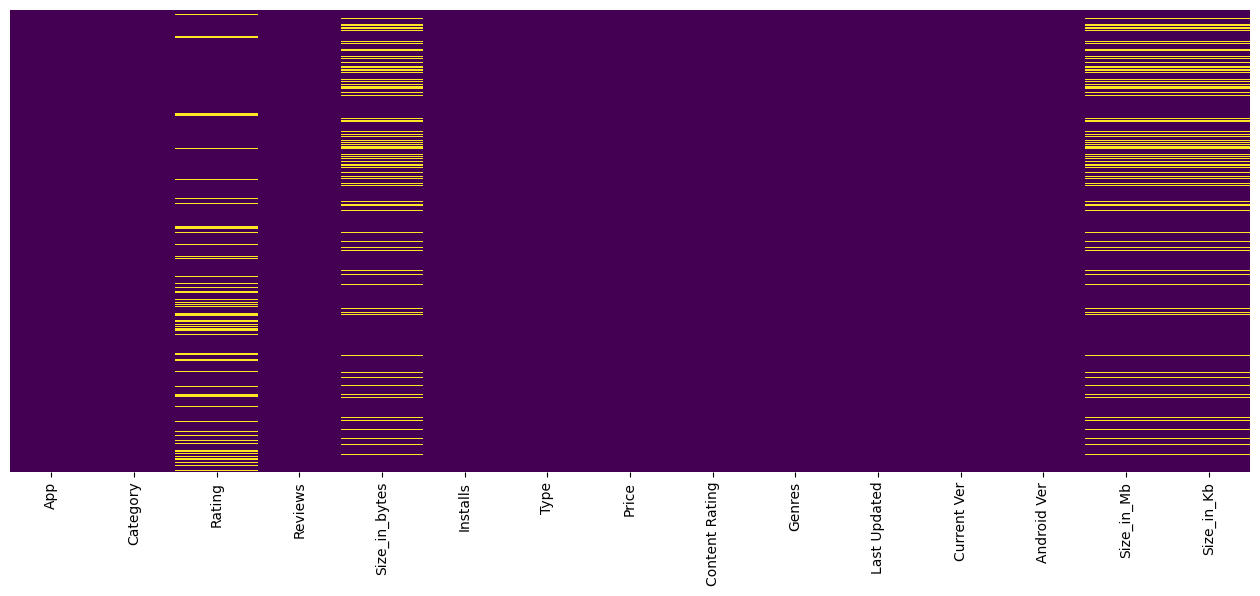

In [336]:
plt.figure(figsize=(16,6))
sns.heatmap(df.isnull(),yticklabels=False,cbar=False,cmap='viridis')

Text(0.5, 1.0, 'Percentage of Missisng values in each column')

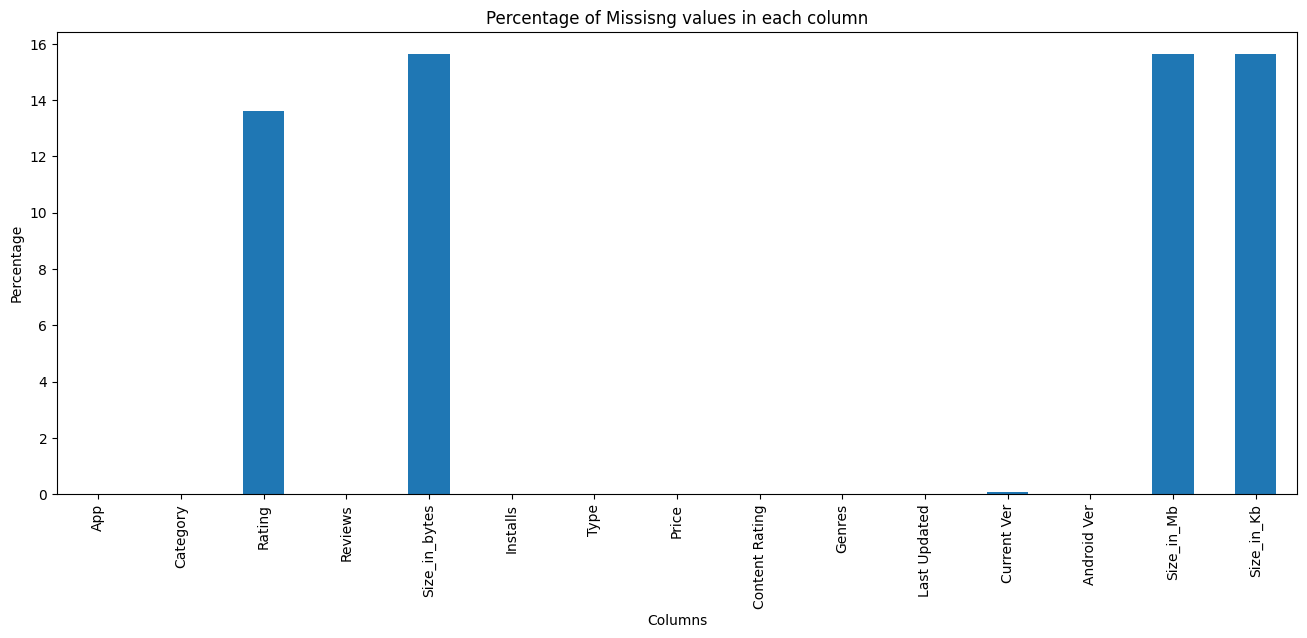

In [339]:
# Plot the null values by their percentage in each column
plt.figure(figsize=(16,6))
missing_percetage = df.isnull().sum()/len(df)*100
missing_percetage.plot(kind='bar')

# adding the lables
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.title("Percentage of Missisng values in each column")

Text(0.5, 1.0, 'Percentage of Missisng values in each column')

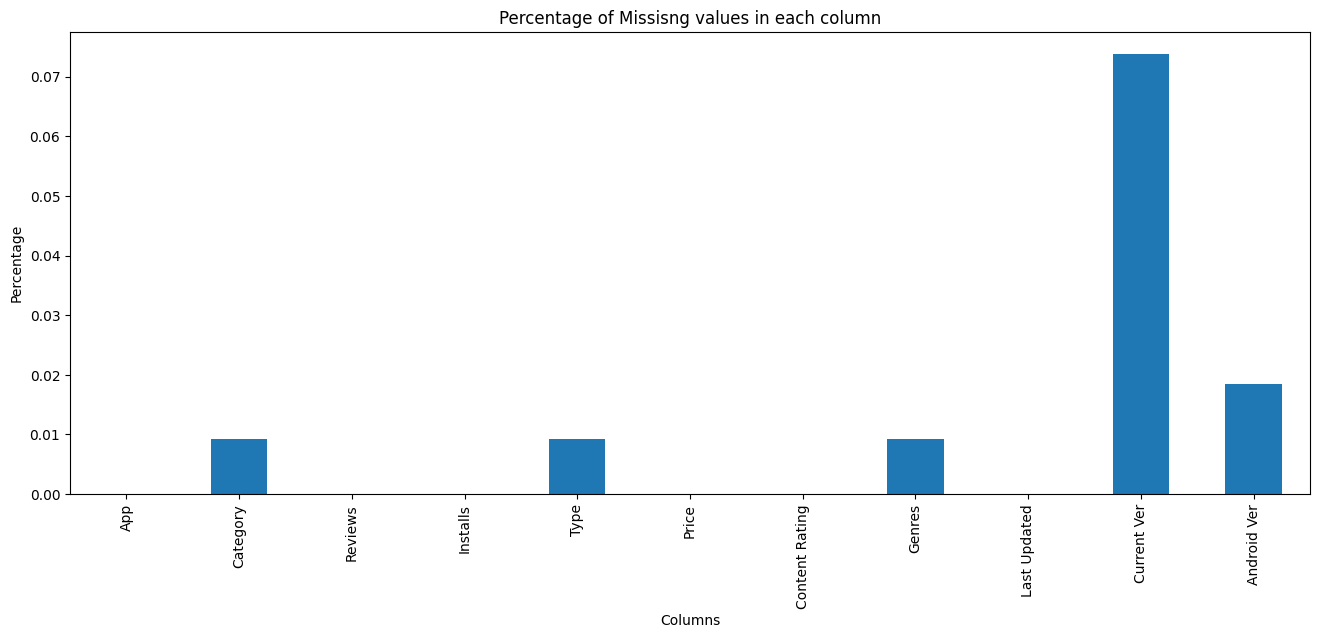

In [341]:
# Now the plot of the missing_percentage less than 1

plt.figure(figsize=(16,6))
missing_percetage[missing_percetage < 1].plot(kind="bar")

# adding the lables
plt.xlabel("Columns")
plt.ylabel("Percentage")
plt.title("Percentage of Missisng values in each column")